# Run MCMC sampling
# Heavy minimal NO geometry, fitting log(m_4), log(m_z)

In [2]:
%load_ext autoreload
%autoreload 2
%load_ext line_profiler

In [3]:
import numpy as np

from Likelihood import LEff
from mcmc_utils import heavy_minimal_mcmc

from multiprocessing import Pool
import os
os.environ["OMP_NUM_THREADS"] = "1"

In [10]:
hierarchy = 'heavy'
D_or_M = 'majorana'
distance = 'log'
smoothing_pars = (0.1, 0.1)

selection = 'cut_based'
set_backend = True
reset_backend = False
n_samples = 10000

spec = 'minimal no geometry and logs'

In [5]:
this_dark_nus_mcmc = heavy_minimal_mcmc(hierarchy, D_or_M, title_addition=spec,
                                   distance=distance, smoothing_pars=smoothing_pars)
df = this_dark_nus_mcmc.provide_df(selection)

heavy majorana


In [6]:
ndim = 3
from ctau_utils import ctau_heavy
def heavy_minimal_posterior_no_geometry_log_masses(parameters):
    '''Posterior in the minimal model with geometry: parameters = [log10_m4, log10_mz, log10_mu_Vmu4_alpha_epsilon2]
       It uses global pars to speed up parallel computation'''
    if (parameters[0] < np.log10(this_dark_nus_mcmc.exp_analysis_obj.m4_limits[0])) or\
       (parameters[0] > np.log10(this_dark_nus_mcmc.exp_analysis_obj.m4_limits[1])) or\
       (parameters[1] < np.log10(this_dark_nus_mcmc.exp_analysis_obj.mz_limits[0])) or\
       (parameters[1] > np.log10(this_dark_nus_mcmc.exp_analysis_obj.mz_limits[1])) or\
       (parameters[0] >= parameters[1]) or\
       (parameters[2] <= np.log10(this_dark_nus_mcmc.exp_analysis_obj.lower_bound_Vmu4_alpha_epsilon2)) or\
       (parameters[2] > np.log10(this_dark_nus_mcmc.exp_analysis_obj.upper_bound_Vmu4_alpha_epsilon2)):
        return -np.inf, -np.inf, -np.inf, -np.inf
    else:
        actual_m4 = 10**parameters[0]
        actual_mz = 10**parameters[1]
        actual_Vmu4_alpha_epsilon2 = 10**parameters[2]
        ctau = ctau_heavy(actual_m4, 
                          actual_mz, 
                          actual_Vmu4_alpha_epsilon2, 
                          D_or_M)
        this_mu = actual_Vmu4_alpha_epsilon2/this_dark_nus_mcmc.exp_analysis_obj.Vmu4_alpha_epsilon2
        mu, sigma2 = this_dark_nus_mcmc.exp_analysis_obj.kde_n_events(df=df,
                                                         m4mz=(actual_m4, actual_mz),
                                                         ctau=None,
                                                         mu=this_mu,
                                                         distance=this_dark_nus_mcmc.distance,
                                                         smoothing=this_dark_nus_mcmc.smoothing_pars)
        return LEff(0, mu, sigma2), mu, sigma2, ctau

labels = ['log10_m4', 'log10_mz', 'log10_Vmu4_alpha_epsilon2']
blobs_dtype = [('mu', float), ('sigma2', float), ('ctau', float)]

In [8]:
this_dark_nus_mcmc.set_posterior(heavy_minimal_posterior_no_geometry_log_masses, 
                                 ndim, 
                                 labels=labels)

In [12]:
n_walkers = ndim**2
with Pool() as pool:
    this_dark_nus_mcmc.initialise_mcmc(n_walkers, pool,
                                       set_backend=set_backend, reset_backend=reset_backend, 
                                       blobs_dtype=blobs_dtype, log_ms=True)
    this_dark_nus_mcmc.run_mcmc(n_samples)

100%|██████████| 10000/10000 [1:49:31<00:00,  1.52it/s]


/n/home00/nfoppiani/.conda/envs/dark_nus/lib/python3.8/site-packages/emcee/autocorr.py:36: RuntimeWarning: invalid value encountered in true_divide
  acf /= acf[0]
N/50 = 0;
tau: [       nan 0.88105746 0.77777778]
N/50 = 0;
tau: [1.00896697 1.10876694 1.36811599]
N/50 = 1;
tau: [3.13662856 2.89384009 2.72102673]
N/50 = 1;
tau: [5.9153453  5.28473238 4.84014503]
N/50 = 2;
tau: [9.78349437 9.97817795 9.2647162 ]
N/50 = 4;
tau: [16.99699893 18.0791683  16.07799369]
N/50 = 7;
tau: [27.44197573 32.1360545  32.63965925]
N/50 = 14;
tau: [43.29986956 46.4325463  41.92937832]
N/50 = 28;
tau: [53.03337584 53.15839151 55.15128956]
N/50 = 54;
tau: [62.20870849 52.97212231 60.38153376]


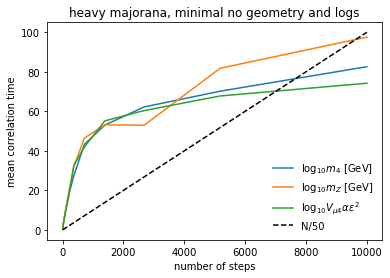

In [11]:
this_dark_nus_mcmc.compute_autocorrelation_time(store=True)

In [ ]:
this_dark_nus_mcmc.get_samples(discard=0, thin=1)

In [ ]:
this_dark_nus_mcmc.plot_chains(store=True)

In [ ]:
this_dark_nus_mcmc.corner_plot_raw(savefile='raw_corner')

In [ ]:
this_dark_nus_mcmc.corner_plot_physics(savefile='physics_corner')

In [ ]:
print('Fraction of samples with null expectation =', (this_dark_nus_mcmc.samples['mu'] == 0).sum()/len(this_dark_nus_mcmc.samples))

In [ ]:
this_dark_nus_mcmc.corner_plot_with_colour('log10_mu', savefile='corner_log10_mu')

In [ ]:
this_dark_nus_mcmc.corner_plot_with_colour('log10_sigma/mu', savefile='corner_log10_sigma_mu')

In [ ]:
this_dark_nus_mcmc.corner_plot_with_colour('log10_ctau', savefile='corner_log10_ctau')